In [ ]:
# Download 91-image_x3.h5 (train), Set5_x3.h5 (eval)
!wget -O 91-image_x3.h5 "https://www.dropbox.com/scl/fi/f1xdreahkyzp5b8cclebu/91-image_x3.h5?rlkey=tnitka8ig4nq86mm26vyhkfqu&e=1&dl=0"
!wget -O Set5_x3.h5 "https://www.dropbox.com/scl/fi/0sfinbzud7q5zuzhxtup0/Set5_x3.h5?rlkey=yxutq9psa4cztdj6x1z7op65u&e=1&dl=0"  

In [2]:
!python train.py --train-file "91-image_x3.h5" \
                --eval-file "Set5_x3.h5" \
                --outputs-dir "outputs/x3_lr1e-4" \
                --scale 3 \
                --lr 1e-4 \
                --batch-size 16 \
                --num-epochs 100 \
                --num-workers 2 \
                --seed 123

Traceback (most recent call last):
  File "c:\Users\2kaus\Documents\5th_Semester_Academic_Info_2025\ML\ML Project\x4\train.py", line 46, in <module>
    train_dataloader = DataLoader(dataset=train_dataset,
                                  batch_size=args.batch_size,
    ...<2 lines>...
                                  pin_memory=True,
                                  drop_last=True)
  File "c:\Users\2kaus\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\dataloader.py", line 388, in __init__
    sampler = RandomSampler(dataset, generator=generator)  # type: ignore[arg-type]
  File "c:\Users\2kaus\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\sampler.py", line 155, in __init__
    if not isinstance(self.num_samples, int) or self.num_samples <= 0:
                      ^^^^^^^^^^^^^^^^
  File "c:\Users\2kaus\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\utils\data\sampler.py", line 164, in num_samples
    return l

In [1]:
!python test.py --weights-file "outputs/x3_lr1e-4/x3/best.pth" \
               --image-file "data/butterfly_GT.bmp" \
               --scale 3

^C


PSNR: 27.70


RGB PSNR (Bicubic vs HR): 21.60
RGB PSNR (SRCNN vs HR): 22.83
Y-channel PSNR (Bicubic vs HR): 21.53
Y-channel PSNR (SRCNN vs HR): 22.79


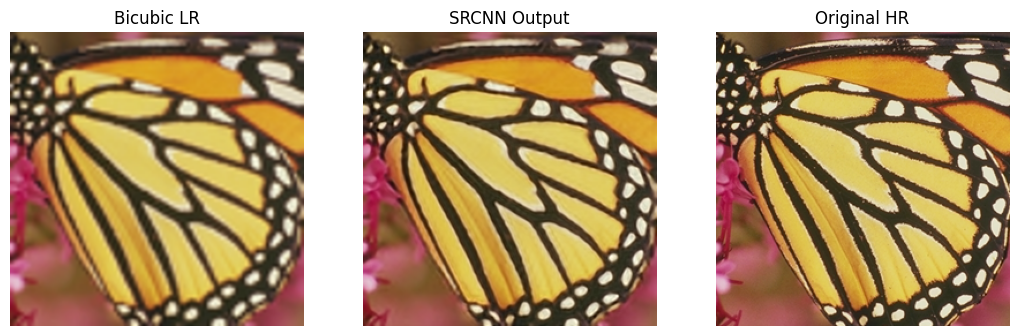

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# --- PATHS TO YOUR IMAGES ---
hr_path = "data/butterfly_GT.bmp"             # Original HR
lr_path = "data/butterfly_GT_bicubic_x3.bmp"  # Bicubic LR
sr_path = "data/butterfly_GT_srcnn_x3.bmp"    # SRCNN output

# --- LOAD IMAGES ---
hr = np.array(Image.open(hr_path)).astype(np.float32)
lr = np.array(Image.open(lr_path)).astype(np.float32)
sr = np.array(Image.open(sr_path)).astype(np.float32)

# --- CROP HR TO MATCH LR/SRCNN ---
height, width = lr.shape[:2]
hr_cropped = hr[:height, :width, :]

# --- DISPLAY SIDE BY SIDE ---
plt.figure(figsize=(22,6))

plt.subplot(1,5,1)
plt.imshow(lr.astype(np.uint8))
plt.title("Bicubic LR")
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(sr.astype(np.uint8))
plt.title("SRCNN Output")
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(hr_cropped.astype(np.uint8))
plt.title("Original HR")
plt.axis('off')


plt.show()

In [11]:
!python plot_results.py

Figure(1200x600)


In [13]:
!python summary_table.py

╒═══════════╤═════════════╤══════════════╤══════════════╕
│ Model     │   Best PSNR │   Best Epoch │   Final Loss │
╞═══════════╪═════════════╪══════════════╪══════════════╡
│ x3_lr1e-3 │     33.1602 │           85 │   0.00113819 │
├───────────┼─────────────┼──────────────┼──────────────┤
│ x3_lr1e-4 │     33.1372 │           96 │   0.00116352 │
├───────────┼─────────────┼──────────────┼──────────────┤
│ x3_lr1e-5 │     32.7114 │           98 │   0.00127213 │
╘═══════════╧═════════════╧══════════════╧══════════════╛
